In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import scanpy as sc

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_noZ\Hao_Harmony_test_no_scale.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')
adata = sc.read_h5ad(dataset_dir / 'PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')

print('Original adata:', adata.shape)
adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')
label = adata.obs['celltype.l1'].tolist()
types = np.unique(label).tolist()
adata.obs.head()

Original adata: (161764, 33538)


,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden
L1_AAACCCAAGAAACTCA,Mono,CD14 Mono,CD14 Mono,Batch1,P2,7,L1,G1,7535,217,10823,2915,4
L1_AAACCCAAGACATACA,CD4_T,CD4 TCM,CD4 TCM_1,Batch1,P1,7,L1,G1,6013,209,5864,1617,2
L1_AAACCCACAACTGGTT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,4786,1890,3
L1_AAACCCACAGCATACT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,7,L1,G1,6402,215,6505,1621,5


Text(0, 0.5, 'Counts')

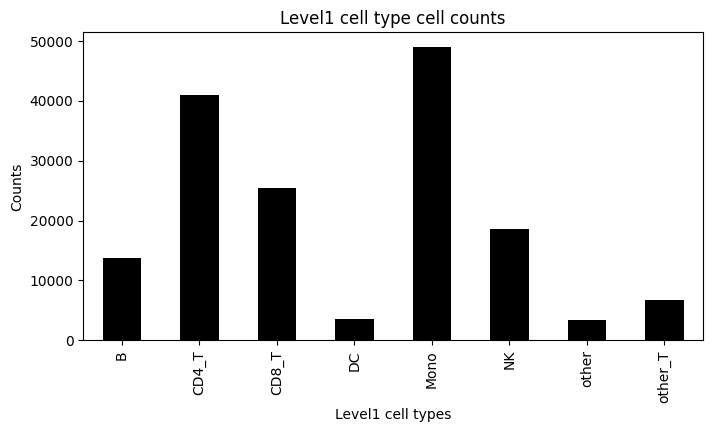

In [4]:
# Plot Level 1 cell counts
# cell number
adata.obs['celltype.l1'].value_counts().loc[types].plot.bar(rot=90, figsize=(8, 4), title='Level1 cell type cell counts', color='black')
plt.xlabel('Level1 cell types')
plt.ylabel('Counts')

## Read metrics

In [7]:
# lr_metrics_l1 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level1/LR_likelihood/LR_metrics_L1_k3_stratifiedKF.csv', index_col=0)
# svm_rbf_metrics_l1 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level1/SVM_model/rbf/SVM_metrics_rbf_StandardScale_l1.csv', index_col=0)
# svm_linear_metrics_l1 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level1/SVM_model/linear/SVM_metrics_linear_StandardScale_l1.csv', index_col=0)
# xgb_metrics_l1 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level1/XGB_model2/XGBclassifier_binary_metrics_l1.csv', index_col=0)

In [8]:
lr_metrics_l1 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/LR_likelihood/LR_metrics_L1_k3_stratifiedKF.csv', index_col=0)
svm_rbf_metrics_l1 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/SVM_model/rbf/SVM_metrics_rbf_StandardScale_l1.csv', index_col=0)
svm_linear_metrics_l1 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/SVM_model/linear/SVM_metrics_linear_StandardScale_l1.csv', index_col=0)
xgb_metrics_l1 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level1/XGB_model2/XGBclassifier_binary_metrics_l1.csv', index_col=0)

In [9]:
lr_metrics_l1

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
B,0.999621,0.998188,0.997373,0.997780,0.999987,0.999837,0.997573
CD4_T,0.969910,0.940597,0.940703,0.940645,0.994097,0.982792,0.920496
CD8_T,0.975736,0.945784,0.897325,0.920914,0.991723,0.968053,0.907036
DC,0.998509,0.970831,0.961686,0.966226,0.999859,0.994325,0.965481
Mono,0.993625,0.983889,0.995256,0.989540,0.998801,0.995464,0.984989
NK,0.992937,0.970475,0.968254,0.969359,0.998744,0.994620,0.965371
other,0.991755,0.932269,0.660850,0.773252,0.933132,0.800238,0.781107
other_T,0.989908,0.909961,0.842942,0.875135,0.993403,0.933653,0.870595


In [10]:
lr_metrics_l1.columns

Index(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC',
       'MCC'],
      dtype='object')

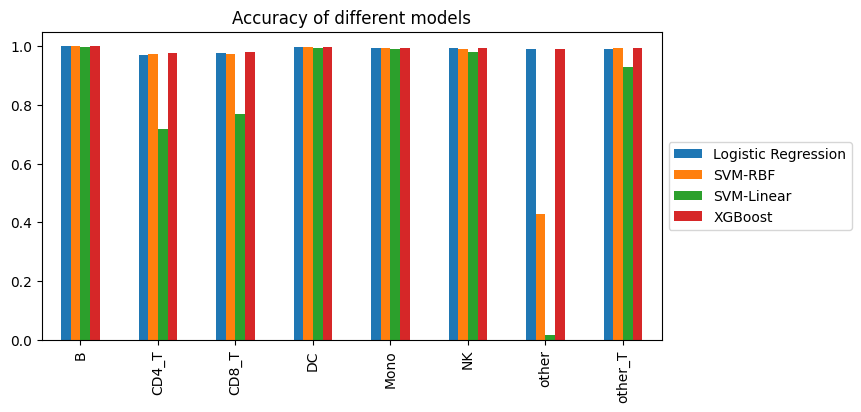

In [11]:
models = ['Logistic Regression', 'SVM-RBF', 'SVM-Linear', 'XGBoost']
model_diff_metrics = [lr_metrics_l1, svm_rbf_metrics_l1, svm_linear_metrics_l1, xgb_metrics_l1]

accuracy_df = pd.DataFrame()
for i, df in enumerate(model_diff_metrics):
    accuracy = df['Accuracy']
    # print(models[i])
    # print(accuracy)
    accuracy_df[models[i]] = accuracy
ax = accuracy_df.plot.bar(rot=90, figsize=(8, 4), title='Accuracy of different models')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

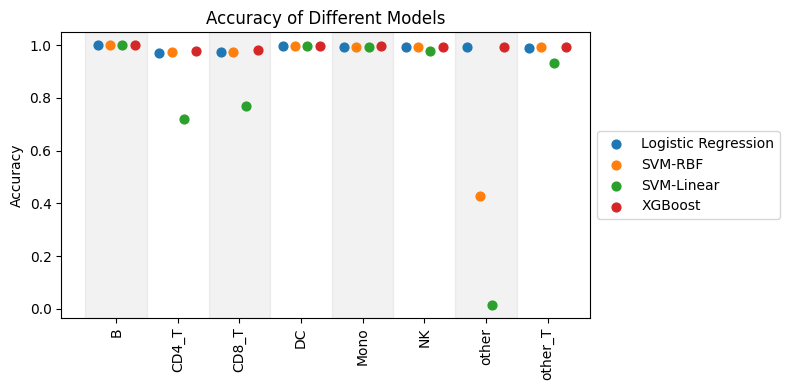

In [12]:
models = ['Logistic Regression', 'SVM-RBF', 'SVM-Linear', 'XGBoost']
model_diff_metrics = [lr_metrics_l1, svm_rbf_metrics_l1, svm_linear_metrics_l1, xgb_metrics_l1]

accuracy_df = pd.DataFrame()
for i, df in enumerate(model_diff_metrics):
    accuracy = df['Accuracy']
    accuracy_df[models[i]] = accuracy

plt.figure(figsize=(8, 4))
x = np.arange(len(accuracy_df))
width = 0.2
for i in range(0, len(accuracy_df), 2):
    plt.axvspan(i-0.5, i+0.5, color='gray', alpha=0.1)
for i, model in enumerate(models):
    i -= 1.5
    plt.scatter(x + i * width, accuracy_df[model], label=model, s=40)  # 's' controls dot size

# Formatting
plt.xticks(x, accuracy_df.index, rotation=90)
plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

In [13]:
def plot_metric_from_diff_models(model_diff_metrics_list, metric_to_plot='Accuracy'):
    models = ['Logistic Regression', 'SVM-RBF', 'SVM-Linear', 'XGBoost']
    metric_df = pd.DataFrame()
    for i, df in enumerate(model_diff_metrics_list):
        metric = df[metric_to_plot]  # accuracy, precision and so on
        metric_df[models[i]] = metric
    
    plt.figure(figsize=(8, 4))
    x = np.arange(len(metric_df))
    width = 0.2
    for i in range(0, len(metric_df), 2):
        plt.axvspan(i-0.5, i+0.5, color='gray', alpha=0.1)
    for i, model in enumerate(models):
        i -= 1.5
        plt.scatter(x + i * width, metric_df[model], label=model, s=40)  # 's' controls dot size

    # Formatting
    plt.xticks(x, metric_df.index, rotation=90)
    plt.title(f'{metric_to_plot} of Different Models')
    plt.ylabel(f'{metric_to_plot}')
    plt.xlim(-0.5, len(metric_df) - 0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

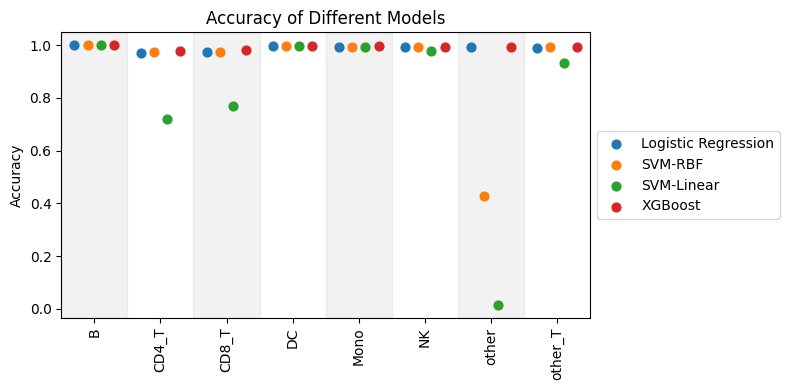

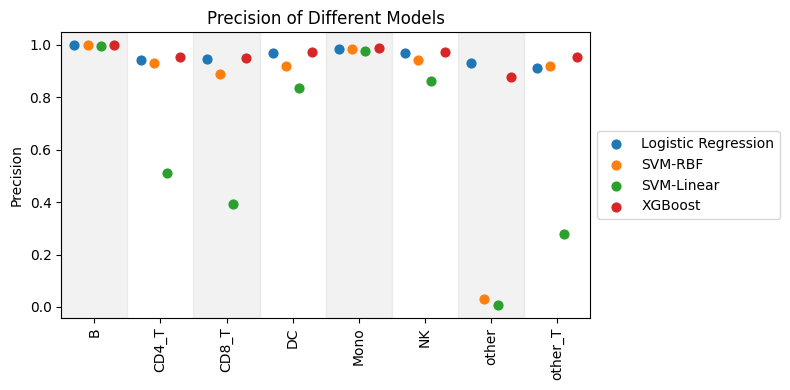

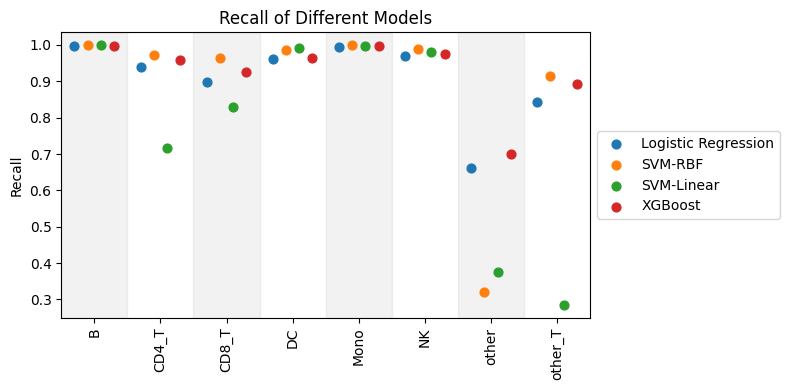

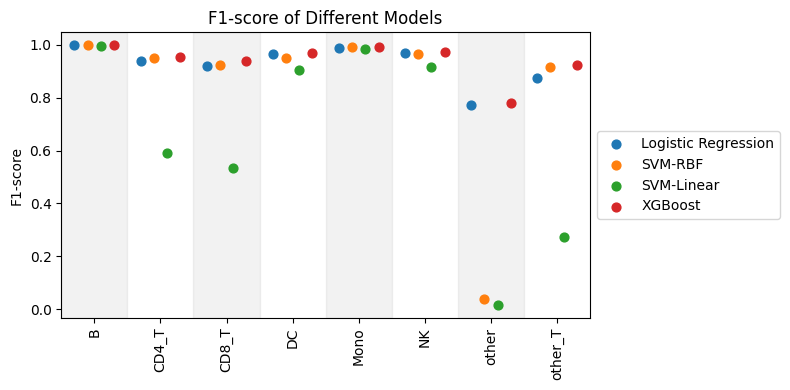

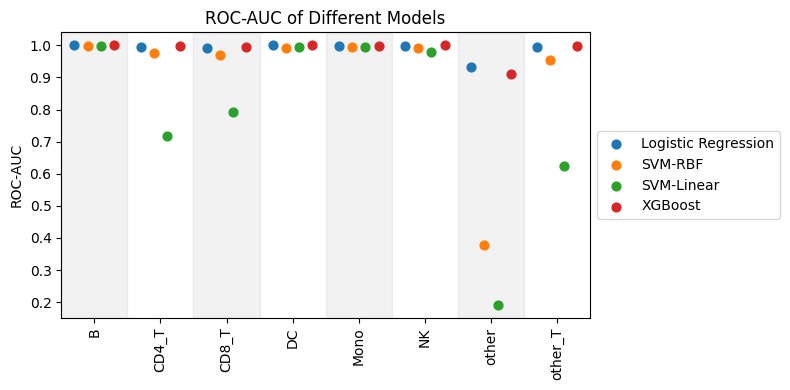

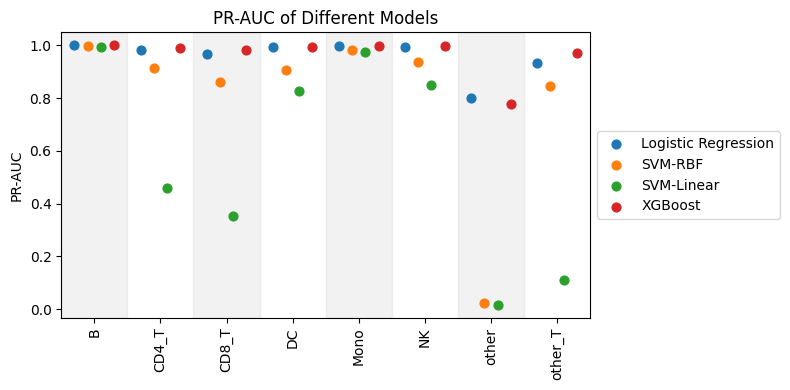

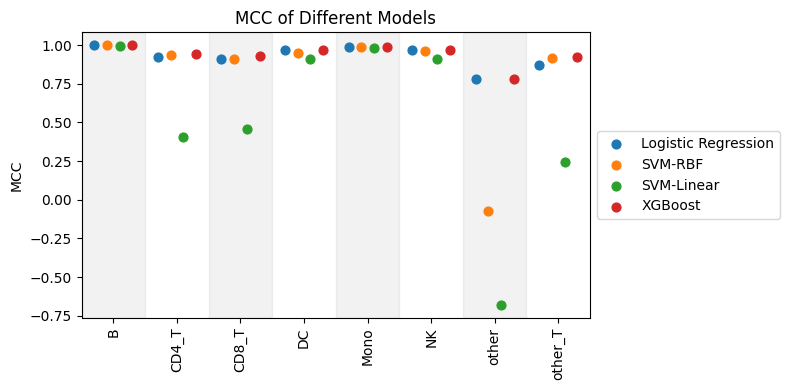

In [14]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC', 'MCC']
for m in metric_names:
    plot_metric_from_diff_models(model_diff_metrics, metric_to_plot=m)

## Barplot

In [15]:
def plot_bar_metric_from_diff_models(model_diff_metrics_list, metric_to_plot='Accuracy', legend=True):
    models = ['Logistic Regression', 'SVM-RBF', 'SVM-Linear', 'XGBoost']
    metric_df = pd.DataFrame()
    for i, df in enumerate(model_diff_metrics_list):
        metric = df[metric_to_plot]  # accuracy, precision and so on
        metric_df[models[i]] = metric
    
    plt.figure(figsize=(8, 4))
    x = np.arange(len(metric_df))
    width = 0.1
    for i in range(0, len(metric_df), 2):
        plt.axvspan(i-0.5, i+0.5, color='gray', alpha=0.1)
    for i, model in enumerate(models):
        i -= 1.5
        plt.bar(x + i * width, metric_df[model], label=model, width=width)
    
    # ax = metric_df.plot.bar(rot=90, figsize=(15, 4), title='Accuracy of different models')
    # ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Formatting
    plt.xticks(x, metric_df.index, rotation=90)
    plt.title(f'{metric_to_plot} of Different Models')
    plt.ylabel(f'{metric_to_plot}')
    plt.ylim(0, 1.05)
    plt.xlim(-0.5, len(metric_df) - 0.5)
    if legend:
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

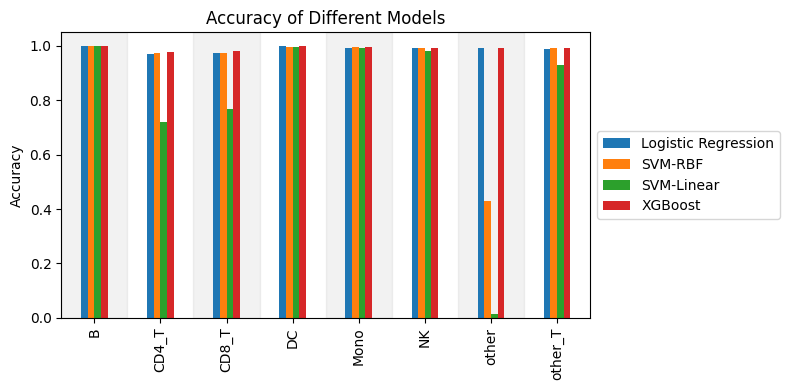

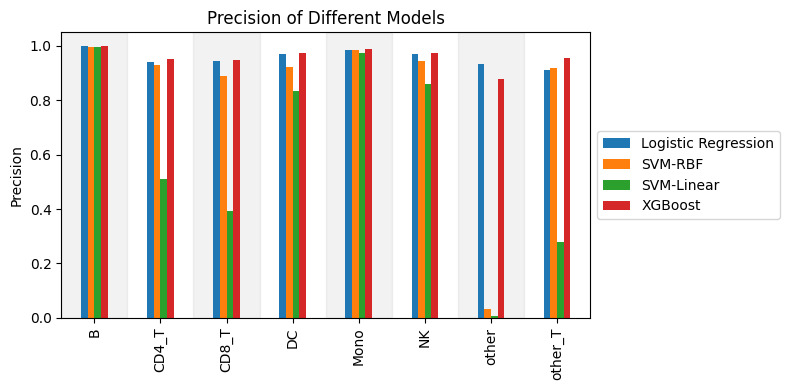

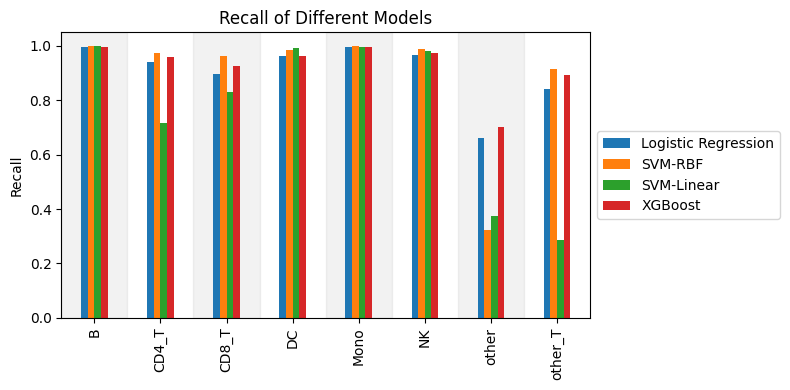

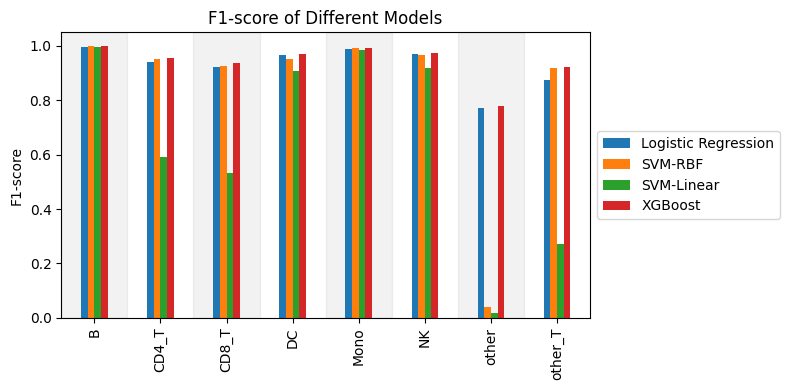

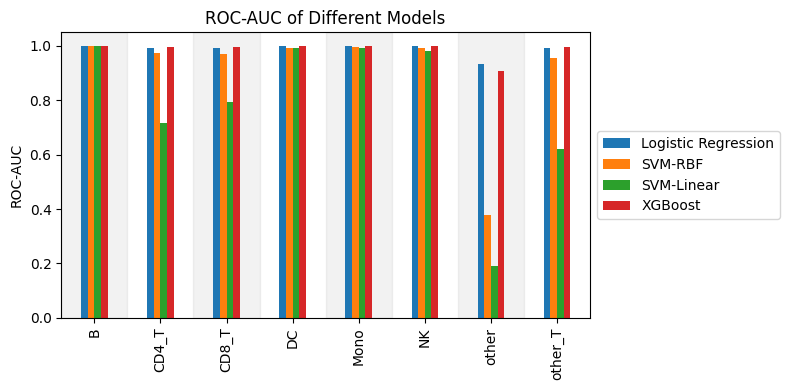

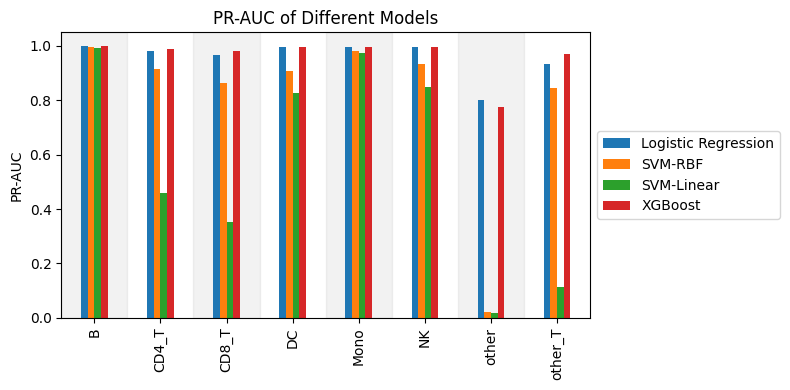

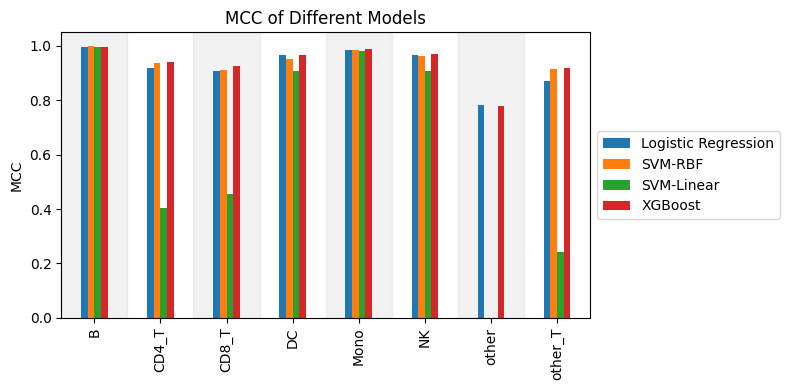

In [16]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC', 'MCC']
for m in metric_names:
    plot_bar_metric_from_diff_models(model_diff_metrics, metric_to_plot=m)